# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

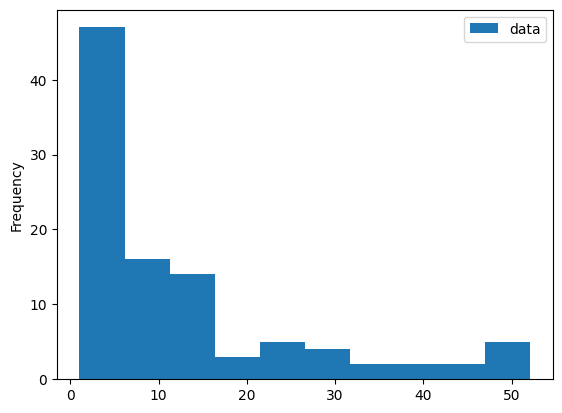

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

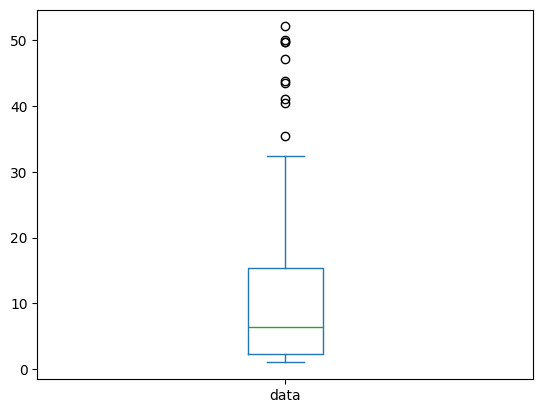

In [3]:
df.plot.box()

I don't find either plot particularly engaging for answering the original question. Both visuals lack significant context without titles, axes, or visuals that clearly highlight high priced drugs.I find the histogram slightly better as you can clearly see the long tail of expensive drugs and the high frequency of drugs under $15. The box plot does show the outliers but they overlap and it's difficult to see the frequency across the population.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
from fpdf import FPDF
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
'''PICK A DATASET'''

# CHOOSE A DATASET TO RUN
# 1 = Priceline
# 2 = Delay Data
# 3 = USDOT Ontime

ds = 1

if ds == 1:
    fname = "priceline_clean.csv"
    dataset_name = "priceline"
elif ds == 2:
    fname = "delay_data_clean.csv"
    dataset_name = "delay"
elif ds == 3:
    fname = "usdot_onetime_clean.csv"
    dataset_name = "usdot"
else:
    fname = None
    print("No dataset selected")

if fname and os.path.exists(fname):
    df = pd.read_csv(fname)
    print(f"Dataset '{fname}' loaded successfully.")
else:
    print(f"File '{fname}' does not exist.")


Dataset 'priceline_clean.csv' loaded successfully.


In [16]:
# Function to calculate summary stats
def calculate_statistics(column):
    non_null_count = df[column].count()
    unique_count = df[column].nunique()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0] if not df[column].mode().empty else np.nan
    std_dev = df[column].std()
    variance = df[column].var()
    minimum = df[column].min()
    maximum = df[column].max()
    value_range = maximum - minimum
    
    return {
        'non_null_count': non_null_count,
        'unique_count': unique_count,
        'mean': mean,
        'median': median,
        'mode': mode,
        'std_dev': std_dev,
        'variance': variance,
        'min': minimum,
        'max': maximum,
        'range': value_range
    }

def generate_plots(df, sample_amt, output_to_pdf, ds_name):
    # Get current timestamp for the PDF filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    pdf_filename = f"output/statistics_plots_{ds_name}_{timestamp}.pdf"
    
    if output_to_pdf:
        pdf_pages = PdfPages(pdf_filename)
        
        # Add title page
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')
        title_text = f"Variable Analysis of the {ds_name} Dataset"
        ax.text(0.5, 0.5, title_text, ha='center', va='center', fontsize=24, fontweight='bold')
        pdf_pages.savefig(fig)
        plt.close(fig)
    
    # Iterate over each numeric column
    for column in df.select_dtypes(include=[np.number]).columns:
        stats = calculate_statistics(column)
        
        if output_to_pdf:
            # Create a new figure for each column's statistics
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.axis('off')
            text = f"Statistics for {column}:\n"
            text += f"Count Non Nulls: {stats['non_null_count']}\n"
            text += f"Count Unique: {stats['unique_count']}\n"
            text += f"Mean: {stats['mean']:.1f}\n"
            text += f"Median: {stats['median']:.1f}\n"
            text += f"Mode: {stats['mode']:.1f}\n"
            text += f"Standard Deviation: {stats['std_dev']:.1f}\n"
            text += f"Variance: {stats['variance']:.1f}\n"
            text += f"Minimum: {stats['min']:.1f}\n"
            text += f"Maximum: {stats['max']:.1f}\n"
            text += f"Range: {stats['range']:.1f}\n"
            ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12)
            pdf_pages.savefig(fig)
            plt.close(fig)
        else:
            print(f"Statistics for {column}:")
            print(f"Count Non Nulls: {stats['non_null_count']}")
            print(f"Count Unique: {stats['unique_count']}")
            print(f"Mean: {stats['mean']:.1f}")
            print(f"Median: {stats['median']:.1f}")
            print(f"Mode: {stats['mode']:.1f}")
            print(f"Standard Deviation: {stats['std_dev']:.1f}")
            print(f"Variance: {stats['variance']:.1f}")
            print(f"Minimum: {stats['min']:.1f}")
            print(f"Maximum: {stats['max']:.1f}")
            print(f"Range: {stats['range']:.1f}\n")
        
        # Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        # KDE plot
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[column], fill=True)
        plt.title(f'KDE Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        # Violin plot
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=df[column])
        plt.title(f'Violin Plot of {column}')
        plt.xlabel(column)
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        # Swarm plot
        plt.figure(figsize=(10, 6))
        sns.swarmplot(x=df[column].sample(n=sample_amt), size=3)
        plt.title(f'Swarm Plot of {column}')
        plt.xlabel(column)
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
    
    if output_to_pdf:
        pdf_pages.close()
        print(f"PDF saved as {pdf_filename}")

# Example usage
# generate_plots(df, sample_amt=100, output_to_pdf=True, ds_name='Ames Housing')  # Save to PDF
# generate_plots(df, sample_amt=100, output_to_pdf=False, ds_name='Ames Housing') # Print and show plots


In [17]:
'''PRICE LINE DATASET'''
fname = "priceline_clean.csv"
dataset_name = "priceline"
df = pd.read_csv(fname)

n_samples = 1000
generate_plots(df, sample_amt=n_samples,output_to_pdf=True, ds_name=dataset_name)

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


PDF saved as output/statistics_plots_priceline_20250615_210619.pdf


In [ ]:
'''FLIGHT DELAY DATASET'''
fname = "delay_data_clean.csv"
dataset_name = "delay"
df = pd.read_csv(fname)

n_samples = 1000
generate_plots(df, sample_amt=n_samples,output_to_pdf=True, ds_name=dataset_name)

In [ ]:
'''USDOT ONTIME DATASET'''
fname = "usdot_onetime_clean.csv"
dataset_name = "usdot"
df = pd.read_csv(fname)

n_samples = 1000
generate_plots(df, n_samples, True, dataset_name)

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.